## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [53]:
print("Number of samples in Training are",(x_train.shape,y_train.shape))

Number of samples in Training are ((60000, 28, 28), (60000,))


In [54]:
print("Number of samples in Training are",(x_test.shape,y_test.shape))

Number of samples in Training are ((10000, 28, 28), (10000,))


### Find dimensions of an image in the dataset

In [55]:
print('dimensions of an image in the dataset are as ',x_train[0].shape)

dimensions of an image in the dataset are as  (28, 28)


In [56]:
x_train.dtype, x_test.dtype

(dtype('uint8'), dtype('uint8'))

Converting Datatype to float 32


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [58]:
x_train.dtype, x_test.dtype

(dtype('float32'), dtype('float32'))

In [59]:
set (y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [60]:
print('dimensions of an image in the dataset are as ',x_train[0].shape)

dimensions of an image in the dataset are as  (28, 28)


In [61]:
import pandas as pd
pd.value_counts(y_train)

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
trainY = np_utils.to_categorical(y_train, num_classes=10)
testY = np_utils.to_categorical(y_test, num_classes=10)

In [63]:
y_train[0]

9

In [64]:
trainY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train /=255

In [0]:
x_test /=255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [67]:
print ("Actual shapeis ",x_train.shape[0])
print ("Actual shapeis ",x_test.shape[0])

Actual shapeis  60000
Actual shapeis  10000


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [69]:
print ("Converted x_train shape is", x_train.shape)
print ("Converted x_train shape is", x_test.shape)

Converted x_train shape is (60000, 28, 28, 1)
Converted x_train shape is (10000, 28, 28, 1)


In [70]:
y_train.shape

(60000,)

In [71]:
trainY.shape

(60000, 10)

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [74]:
# Define model
    model = Sequential()

    # 1st Conv Layer
    model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))

    # 2nd Conv Layer
    model.add(Convolution2D(32, 3, 3))
    model.add(Activation('relu'))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))

    # Prediction Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))

    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]


    # Train the model2
    model.fit(x_train, trainY, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, testY), callbacks=callback_list)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 27s 445us/step - loss: 0.3709 - acc: 0.8656 - val_loss: 0.2865 - val_acc: 0.9010
Epoch 2/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.2271 - acc: 0.9159 - val_loss: 0.2543 - val_acc: 0.9060
Epoch 3/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.1630 - acc: 0.9391 - val_loss: 0.2594 - val_acc: 0.9101
Epoch 4/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.1132 - acc: 0.9576 - val_loss: 0.2815 - val_acc: 0.9099
Epoch 5/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.0736 - acc: 0.9726 - val_loss: 0.3152 - val_acc: 0.9126
Epoch 6/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0494 - acc: 0.9826 - val_loss: 0.3932 - val_acc: 0.9131
Epoch 7/10
600

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [76]:
# Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.5))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, trainY, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, testY), callbacks=callback_list)
    



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.5056 - acc: 0.8202 - val_loss: 0.3193 - val_acc: 0.8857
Epoch 2/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.3408 - acc: 0.8777 - val_loss: 0.2897 - val_acc: 0.8961
Epoch 3/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.2901 - acc: 0.8948 - val_loss: 0.2501 - val_acc: 0.9077
Epoch 4/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.2621 - acc: 0.9045 - val_loss: 0.2504 - val_acc: 0.9056
Epoch 5/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.2416 - acc: 0.9110 - val_loss: 0.2299 - val_acc: 0.9189
Epoch 6/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.2216 - acc: 0.9196 - val_loss: 0.2258 - val_acc: 0.9165
Epoch 7/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.2086 - acc: 0.9238 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

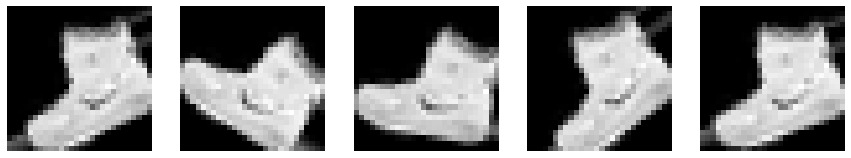

In [79]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [80]:
model2.fit_generator(datagen.flow(x_train, trainY,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, testY), callbacks=callback_list)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5902 - acc: 0.7849 - val_loss: 0.4978 - val_acc: 0.8231
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4235 - acc: 0.8457 - val_loss: 0.4416 - val_acc: 0.8448
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3653 - acc: 0.8657 - val_loss: 0.4013 - val_acc: 0.8658
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3318 - acc: 0.8773 - val_loss: 0.4010 - val_acc: 0.8548
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3113 - acc: 0.8851 - val_loss: 0.3603 - val_acc: 0.8747
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2920 - acc: 0.8942 - val_loss: 0.3375 - val_acc: 0.8795
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2798 - acc: 0.8965 - val_loss: 0.3414 - val_acc: 0.8873
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [81]:
loss_and_metrics = model3.evaluate(x_test, testY)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 90us/step
[0.227947796061635, 0.9176]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [89]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [91]:
print("Number of samples in Training are",(x_test.shape,y_test.shape))

Number of samples in Training are ((10000, 32, 32, 3), (10000, 1))


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


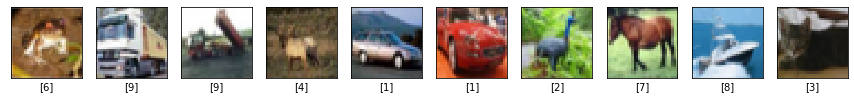

In [110]:
#plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images




### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

[]

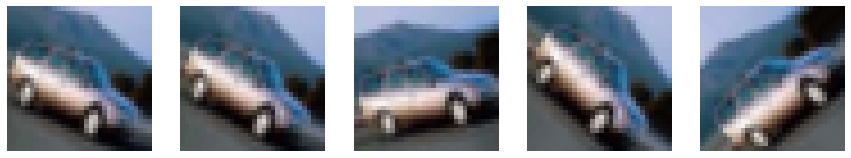

In [117]:
genrator = data_gen.flow(x_train[4:5], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(genrator.next().squeeze().astype('uint8'))
plt.plot()